## **CUSTOMER_CHURN_PREDICTION**

In [3]:
import tensorflow as tf

import matplotlib.pyplot as plt
import keras
import re
import os
from keras.models import load_model
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# **Preprocess data**

In [4]:


df= pd.read_csv('Churn_Modelling.csv')

df .head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# cheak if there any null value or not
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# cheak the datatype
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
# cheak if there any duplicate value or not
df.duplicated().sum()

0

In [9]:
# plot
count = df['Exited']
count.value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
df['Geography'].value_counts()


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:

df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:

df['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [13]:

df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [14]:
# drop unnecessary columns
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace= True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
# convert all dtype in float
label_encoder = LabelEncoder()
columns_to_convert_in_string_to_int = ['Geography','Gender']
for col in columns_to_convert_in_string_to_int:
    df[col] = label_encoder.fit_transform(df[col])
columns_to_convert_in_int_to_float = ['CreditScore','Geography','Gender', 'Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember']
for col in columns_to_convert_in_int_to_float:
    df[col] = df[col].astype('float64')

In [17]:
df.dtypes

CreditScore        float64
Geography          float64
Gender             float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


In [19]:
X = df.drop(columns=['Exited'])
Y = df['Exited']

In [20]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0.0,1.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,516.0,0.0,1.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,709.0,0.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,772.0,1.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


In [21]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [22]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [23]:
X

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [24]:
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

# **Models**

**Tensorflow model (custom)**

In [26]:
model = Sequential([
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=64, validation_split=0.2)

Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7668 - loss: 0.5509 - val_accuracy: 0.7987 - val_loss: 0.4695
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7837 - loss: 0.4815 - val_accuracy: 0.7987 - val_loss: 0.4425
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7947 - loss: 0.4520 - val_accuracy: 0.8019 - val_loss: 0.4266
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8086 - loss: 0.4319 - val_accuracy: 0.8238 - val_loss: 0.4116
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8261 - loss: 0.4206 - val_accuracy: 0.8344 - val_loss: 0.3974
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8439 - loss: 0.3876 - val_accuracy: 0.8419 - val_loss: 0.3860
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8487 - loss: 0.3782 - val_accuracy: 0.8419 - val_loss: 0.3755
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8486 - loss: 0.3681 - val_accuracy: 0.

**Logistic Regression**

In [29]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

**Gradient Boosting**

In [30]:
gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=42)

# **Models evaluation and predection**

**Tensorflow model**

In [31]:
# Evaluate
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'\n Accuracy: {accuracy}')

# Predict
y_pred_tf = (model.predict(X_test) > 0.5).astype("int32")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8562 - loss: 0.3545

 Accuracy: 0.8579999804496765
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


**Logistic Regression**

In [32]:
# Predict
y_pred_log_reg = log_reg.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_log_reg)}")
print(classification_report(Y_test, y_pred_log_reg))

Accuracy: 0.8155
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



**Gradient Boosting**

In [33]:
# Predict
y_pred_gb = gb.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_gb)}")
print(classification_report(Y_test, y_pred_gb))

Accuracy: 0.866
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



# **Visualization(confusion matrix)**

In [45]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


**Tensorflow model**

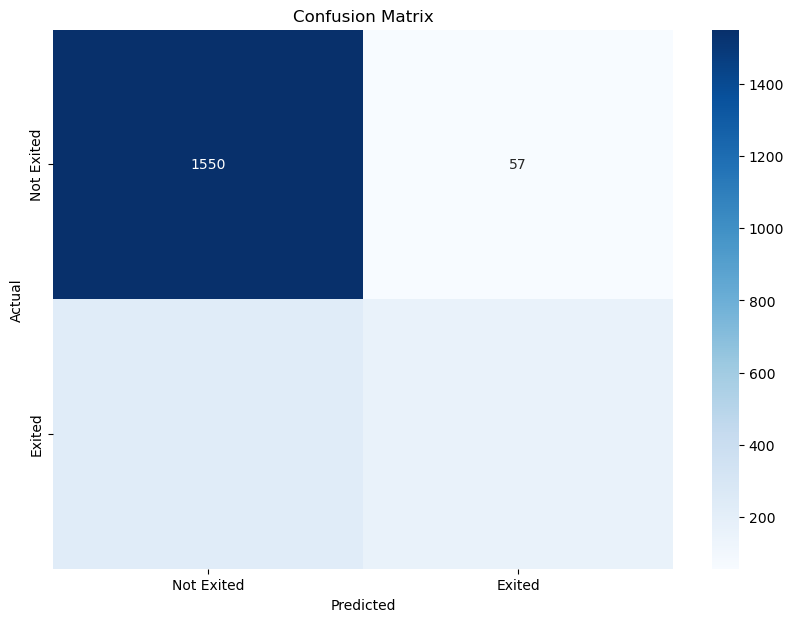

In [46]:
plot_confusion_matrix(Y_test, y_pred_tf)

**Logistic Regression**

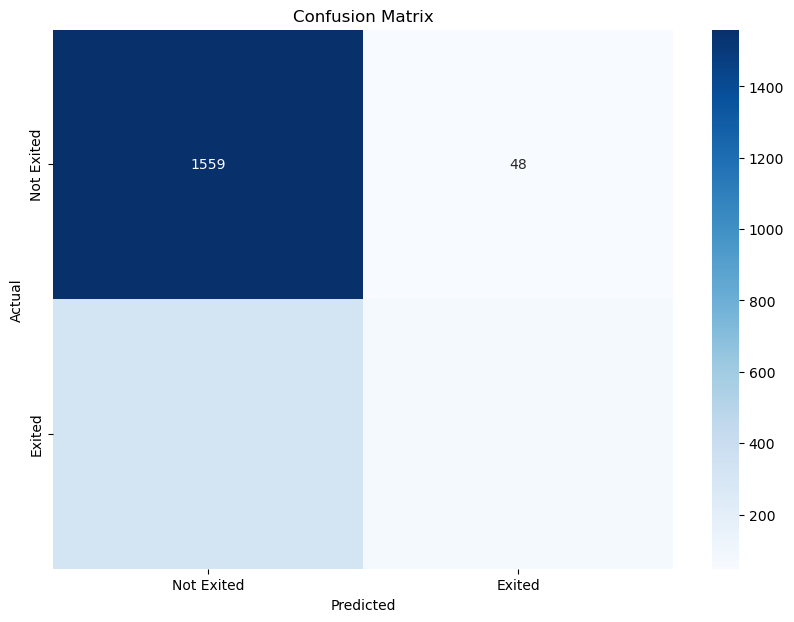

In [47]:
plot_confusion_matrix(Y_test, y_pred_log_reg)

**Gradient Boosting**

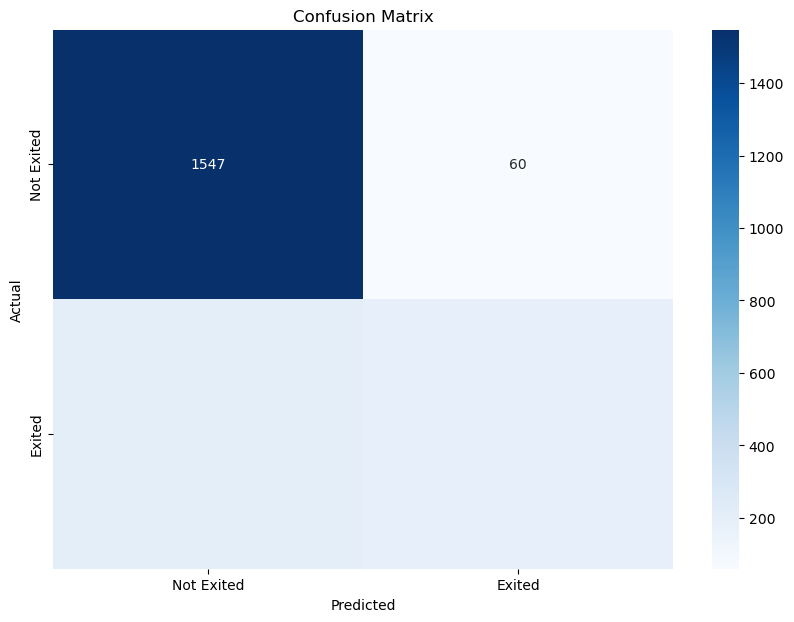

In [37]:
plot_confusion_matrix(Y_test, y_pred_gb)